In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
import math

# Loading Data:

We will load the data from a kaggle source. The main purpose of this dataset is to utilize regression models to predict the "song_popularity" variable, a confidence measure from 0-100 indicating the songs traction with audiences. With the following features:

- song_duration_ms: Song length in milliseconds
- acousticness: "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."
- danceability: A confidence measure from 0.0 to 1.0 of how suitable a track is for dancing
- energy:  A confidence measure from 0.0 to 1.0 of how energetic a track is
- instrumentalness: Predicts whether a track contains no vocals
- loudness: The overall loudness of a track in decibels (dB)
- audio_mode: Binary indication of tonal or modal music
- speechiness: "Speechiness detects the presence of spoken words in a track"
- tempo: The overall estimated tempo of a track in beats per minute (BPM)
- time_signature: How many note values are contained in each bar
- audio_valence:  A confidence measure from 0.0 to 1.0 of how "happy" a song is.

In [2]:
#Load in the data & load into a data frame

df = pd.read_csv('song_data.csv')

df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18830              Let It Breathe               60            159645   
18831                     Answers               60            205666   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18831      0.765000         0.495   0.161          0.000001   11    0.1050   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18830   -16.107           1       0.0348  113.969               4   
18831   -14.078           0       0.0301   94.286               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0              0.474  
1              0.370  
2              0.324  
3              0.198  
4              0.574  
...              ...  
18830          0.300  
18831          0.265  
18832          0.286  
18833          0.323  
18834          0.581  

[18835 rows x 15 columns]

In [3]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

# Data Cleaning:

The purpose of data cleaning is to begin to prep our dataset for data exploration and data modelling. 

Important things to do during cleaning are: Filling in null values, removing duplicate entries, ensure correct data types.

Particularly in this dataset, we did not have to clean much as we needed to. There are no null values, there were 5765 duplicated values for which were removed for simplicity. The reasoning behind removing the duplicates is there are no indications of how to distinguish between song names besides the features. There is no mention of unique identifications or artists name for this dataset so all duplicates were promptly removed. 

All the datatypes lined up with the column description given within the dataset.


In [6]:
#Check for null or empty values in a dataset
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [7]:
#Find any duplicated values 
print(df[df.duplicated(['song_name'])]['song_name'].count())

5765


In [8]:
#Found 5765 duplicates. We find no need to keep these duplicates so we can drop these
df.drop_duplicates(subset='song_name',keep='first', inplace=True)
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18827                  Stay Awake               55            114582   
18830              Let It Breathe               60            159645   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18827      0.898000         0.370   0.136          0.000263    7    0.0999   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
18827   -13.528           1       0.0433  146.081               4   
18830   -16.107           1       0.0348  113.969               4   
18832   -12.222           1       0.0355  130.534               4   
18833   -12.020           1       0.0328  106.063               4   
18834   -11.790           1       0.0302   91.490               4   

       audio_valence  
0             0.4740  
1             0.3700  
2             0.3240  
3             0.1980  
4             0.5740  
...              ...  
18827         0.0592  
18830         0.3000  
18832         0.2860  
18833         0.3230  
18834         0.5810  

[13070 rows x 15 columns]

In [9]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

In [10]:
df['song_name'].unique().tolist()

['Boulevard of Broken Dreams',
 'In The End',
 'Seven Nation Army',
 'By The Way',
 'How You Remind Me',
 'Bring Me To Life',
 'Last Resort',
 'Are You Gonna Be My Girl',
 'Mr. Brightside',
 'Sex on Fire',
 'The Middle',
 'Numb',
 'Smooth Criminal',
 "Can't Stop",
 'Chop Suey!',
 'Take Me Out',
 'I Miss You',
 'Best of You',
 'I Write Sins Not Tragedies',
 'Kryptonite',
 'The Kill (Bury Me)',
 'Use Somebody',
 'No One Knows',
 'Jerk It Out',
 'Uprising',
 'Hey There Delilah',
 'Blurry',
 'American Idiot',
 'Welcome to the Black Parade',
 'Gives You Hell',
 'All My Life',
 'Like a Stone',
 "It's Been Awhile",
 'I Hate Everything About You',
 "Rollin' (Air Raid Vehicle)",
 'Fat Lip',
 'The Pretender',
 'Savior',
 'Bodies',
 "Sugar, We're Goin Down",
 'Last Nite',
 'Through Glass',
 'The Diary of Jane - Single Version',
 'Down With the Sickness',
 'Wish You Were Here',
 'Youth Of The Nation',
 'Vertigo',
 'Miss Murder',
 'I Bet You Look Good On The Dancefloor',
 'Steady, As She Goes',
 'F

# Data Exploration:


## Subsection 1: Distribution Plots

Features with a normal distribution:

- danceability
- energy (skewed normal)
- song_duration_ms (skewed normal)
- loudness (skewed normal)

In [11]:

def distribution_plots(df, distribution_type):
    num_columns = len(df.columns)

    plots_per_row = 4
    num_rows = 4

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 20))

    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        
        if distribution_type == 'boxplot':
            sns.boxplot(y=df[column], ax=axes[i])
            axes[i].set_title(f'{column} distribution')
        if distribution_type == 'histogram':
            sns.histplot(x=df[column], ax=axes[i])
            axes[i].set_title(f'{column} distribution')
            
        if distribution_type == 'violin':
            sns.violinplot(y=df[column], ax=axes[i])
            axes[i].set_title(f'{column} distribution')
            
        if distribution_type == 'kde':
            sns.kdeplot(data=df[column],  ax=axes[i])
            axes[i].set_title(f'{column} distribution')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()

    plt.show()

    



In [12]:
temp_df = df.drop(['song_name'], axis=1)


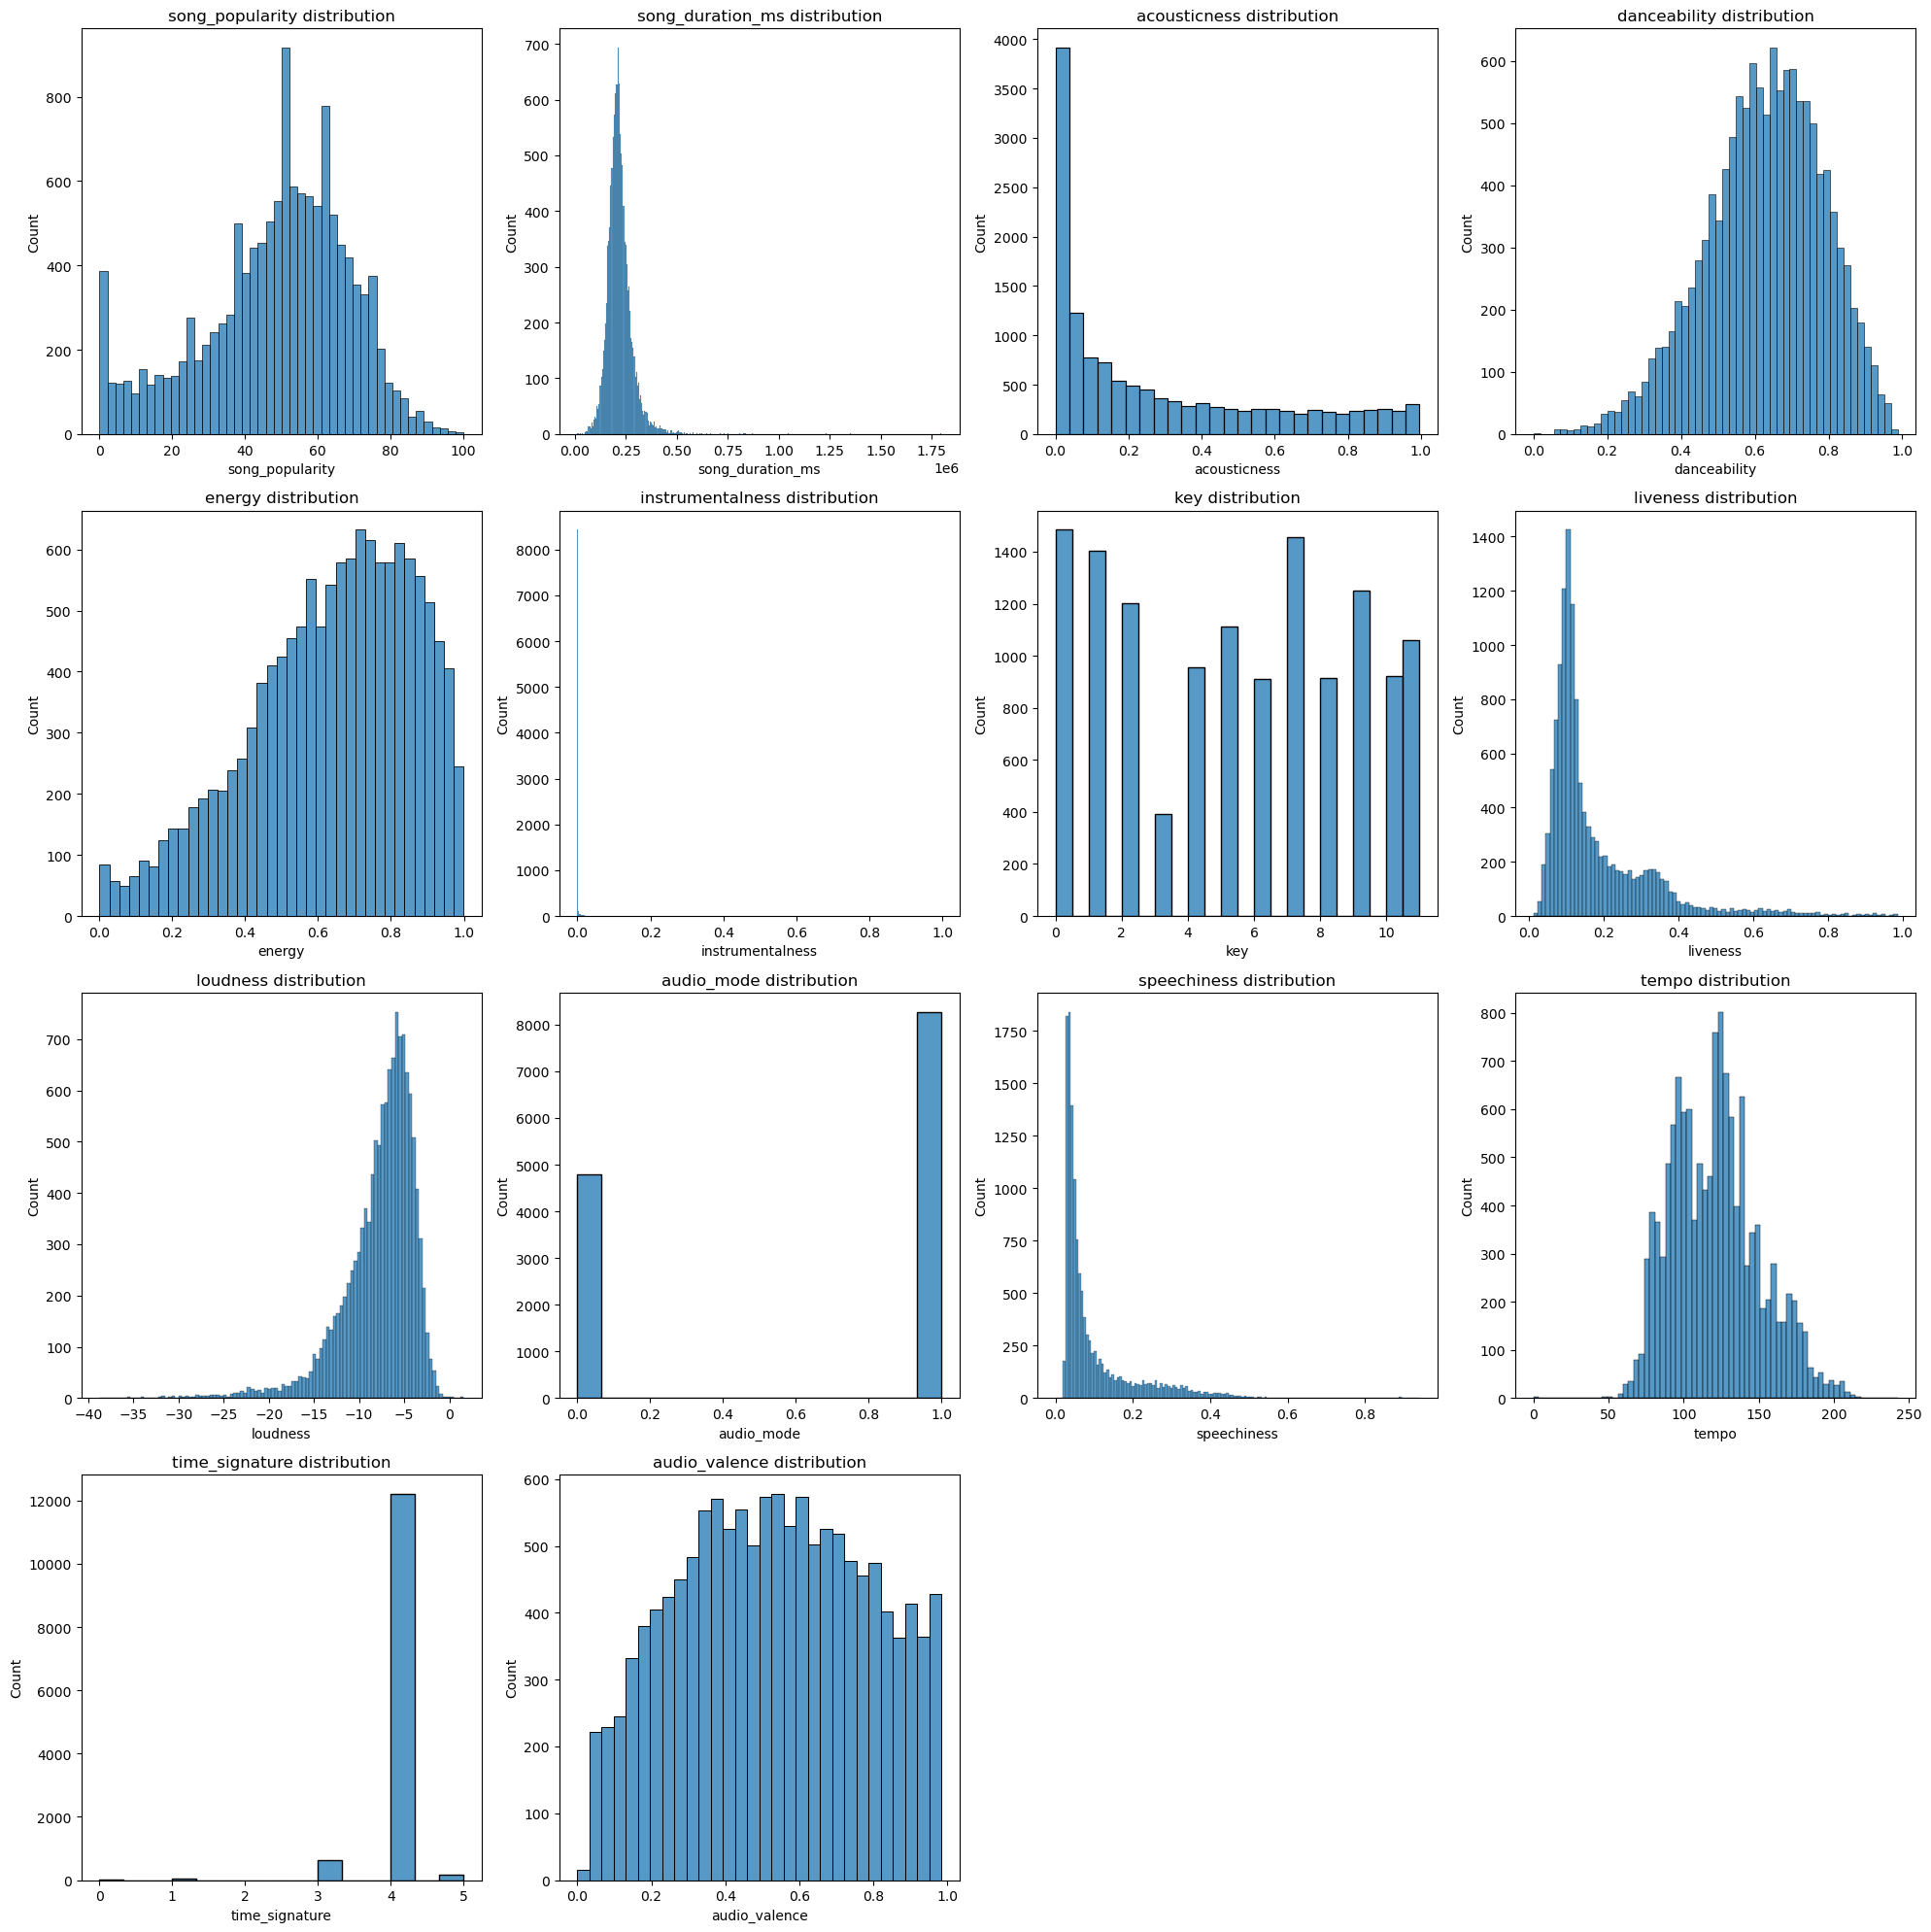

In [13]:
distribution_plots(temp_df,'histogram')

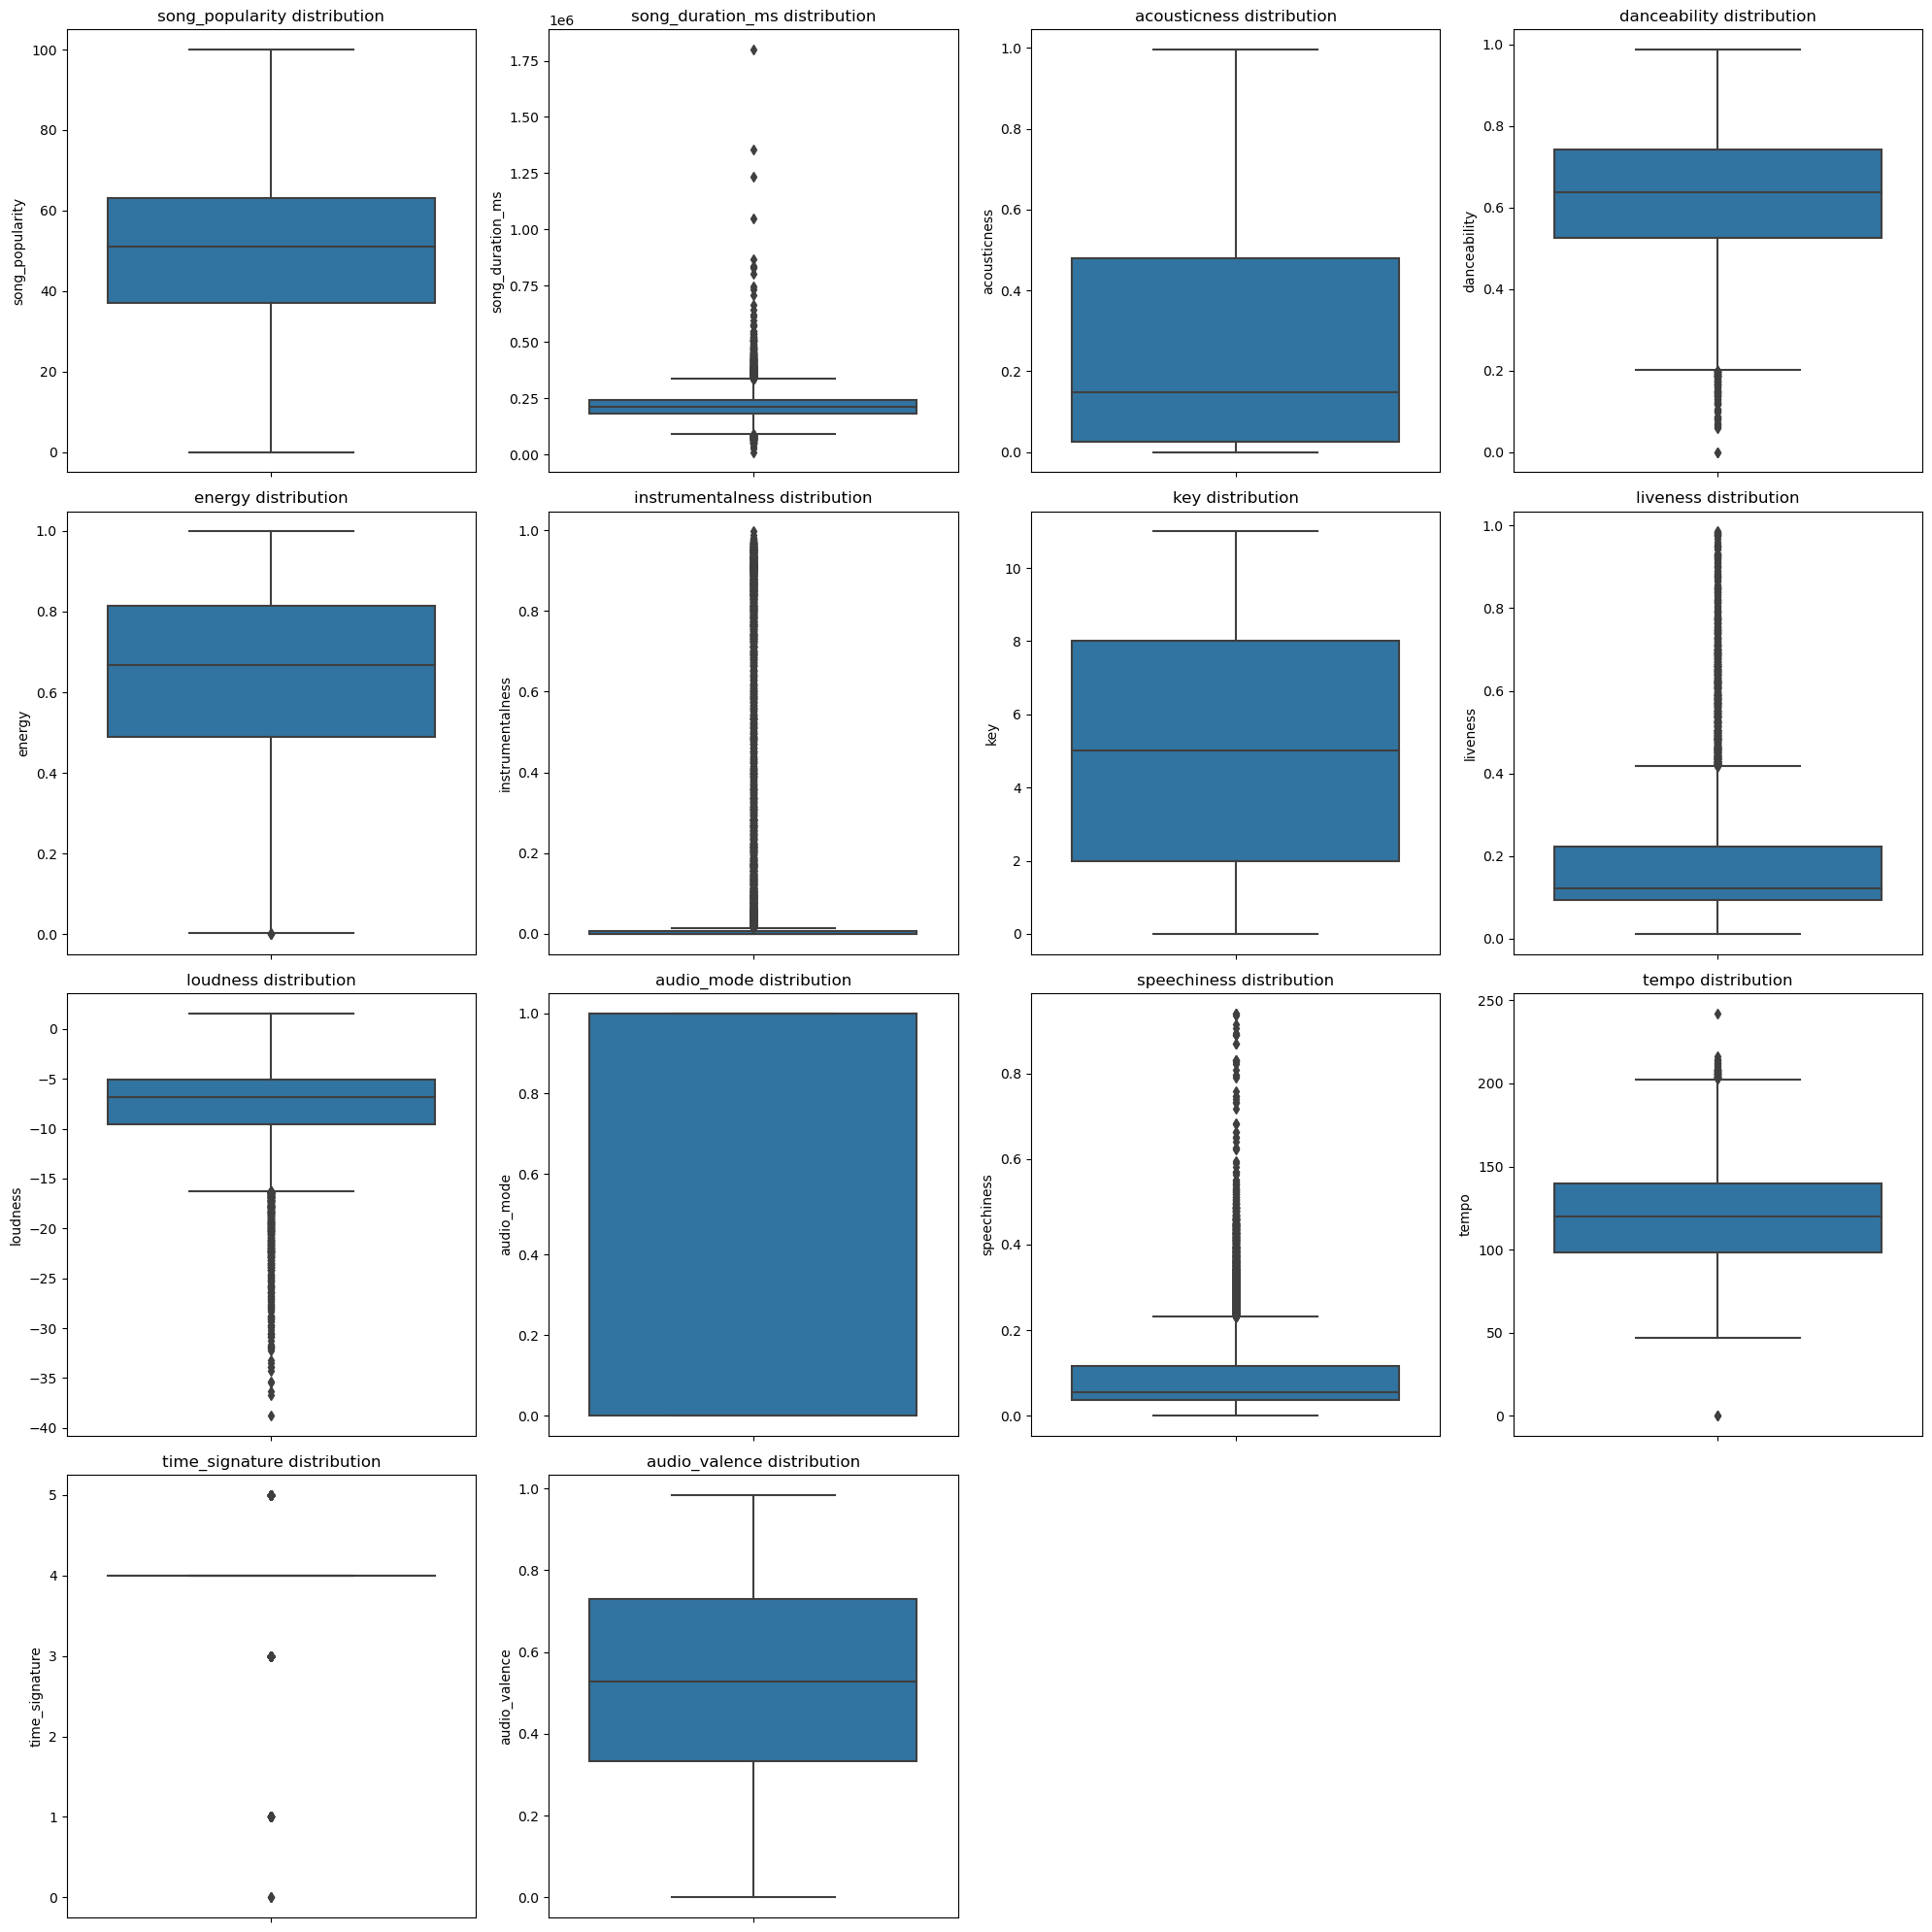

In [14]:
distribution_plots(temp_df,'boxplot')

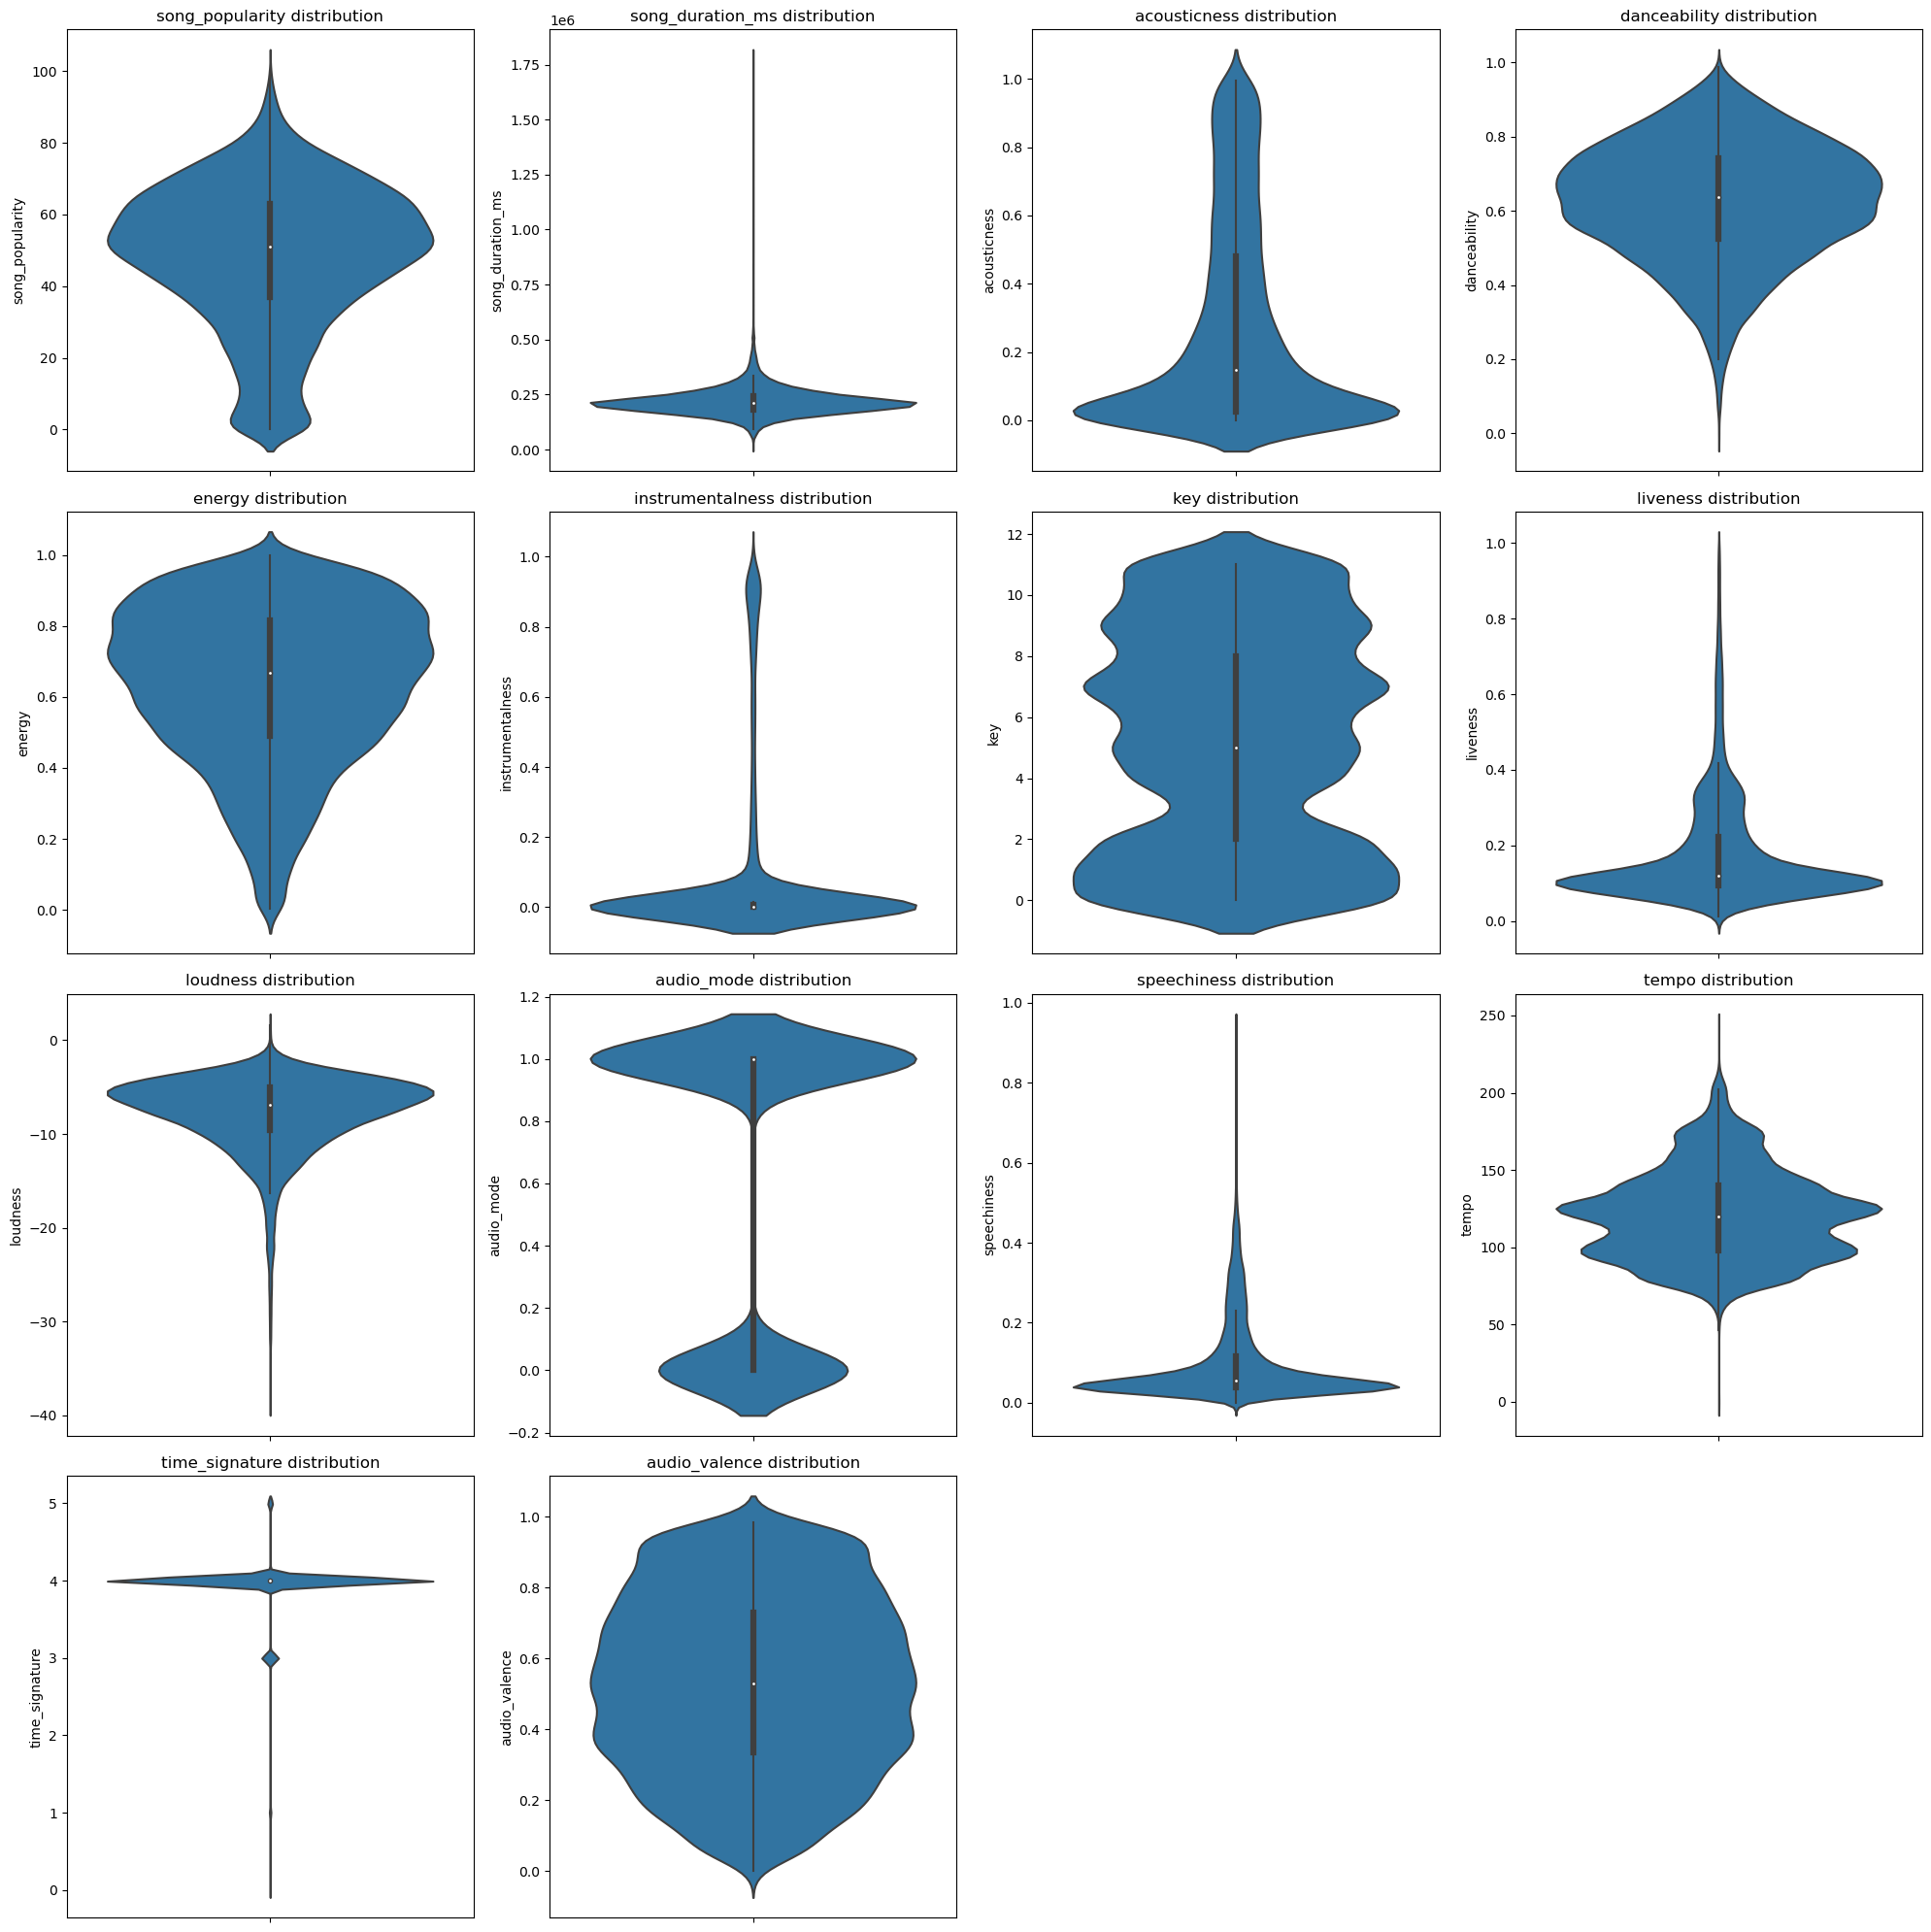

In [15]:
distribution_plots(temp_df,'violin')

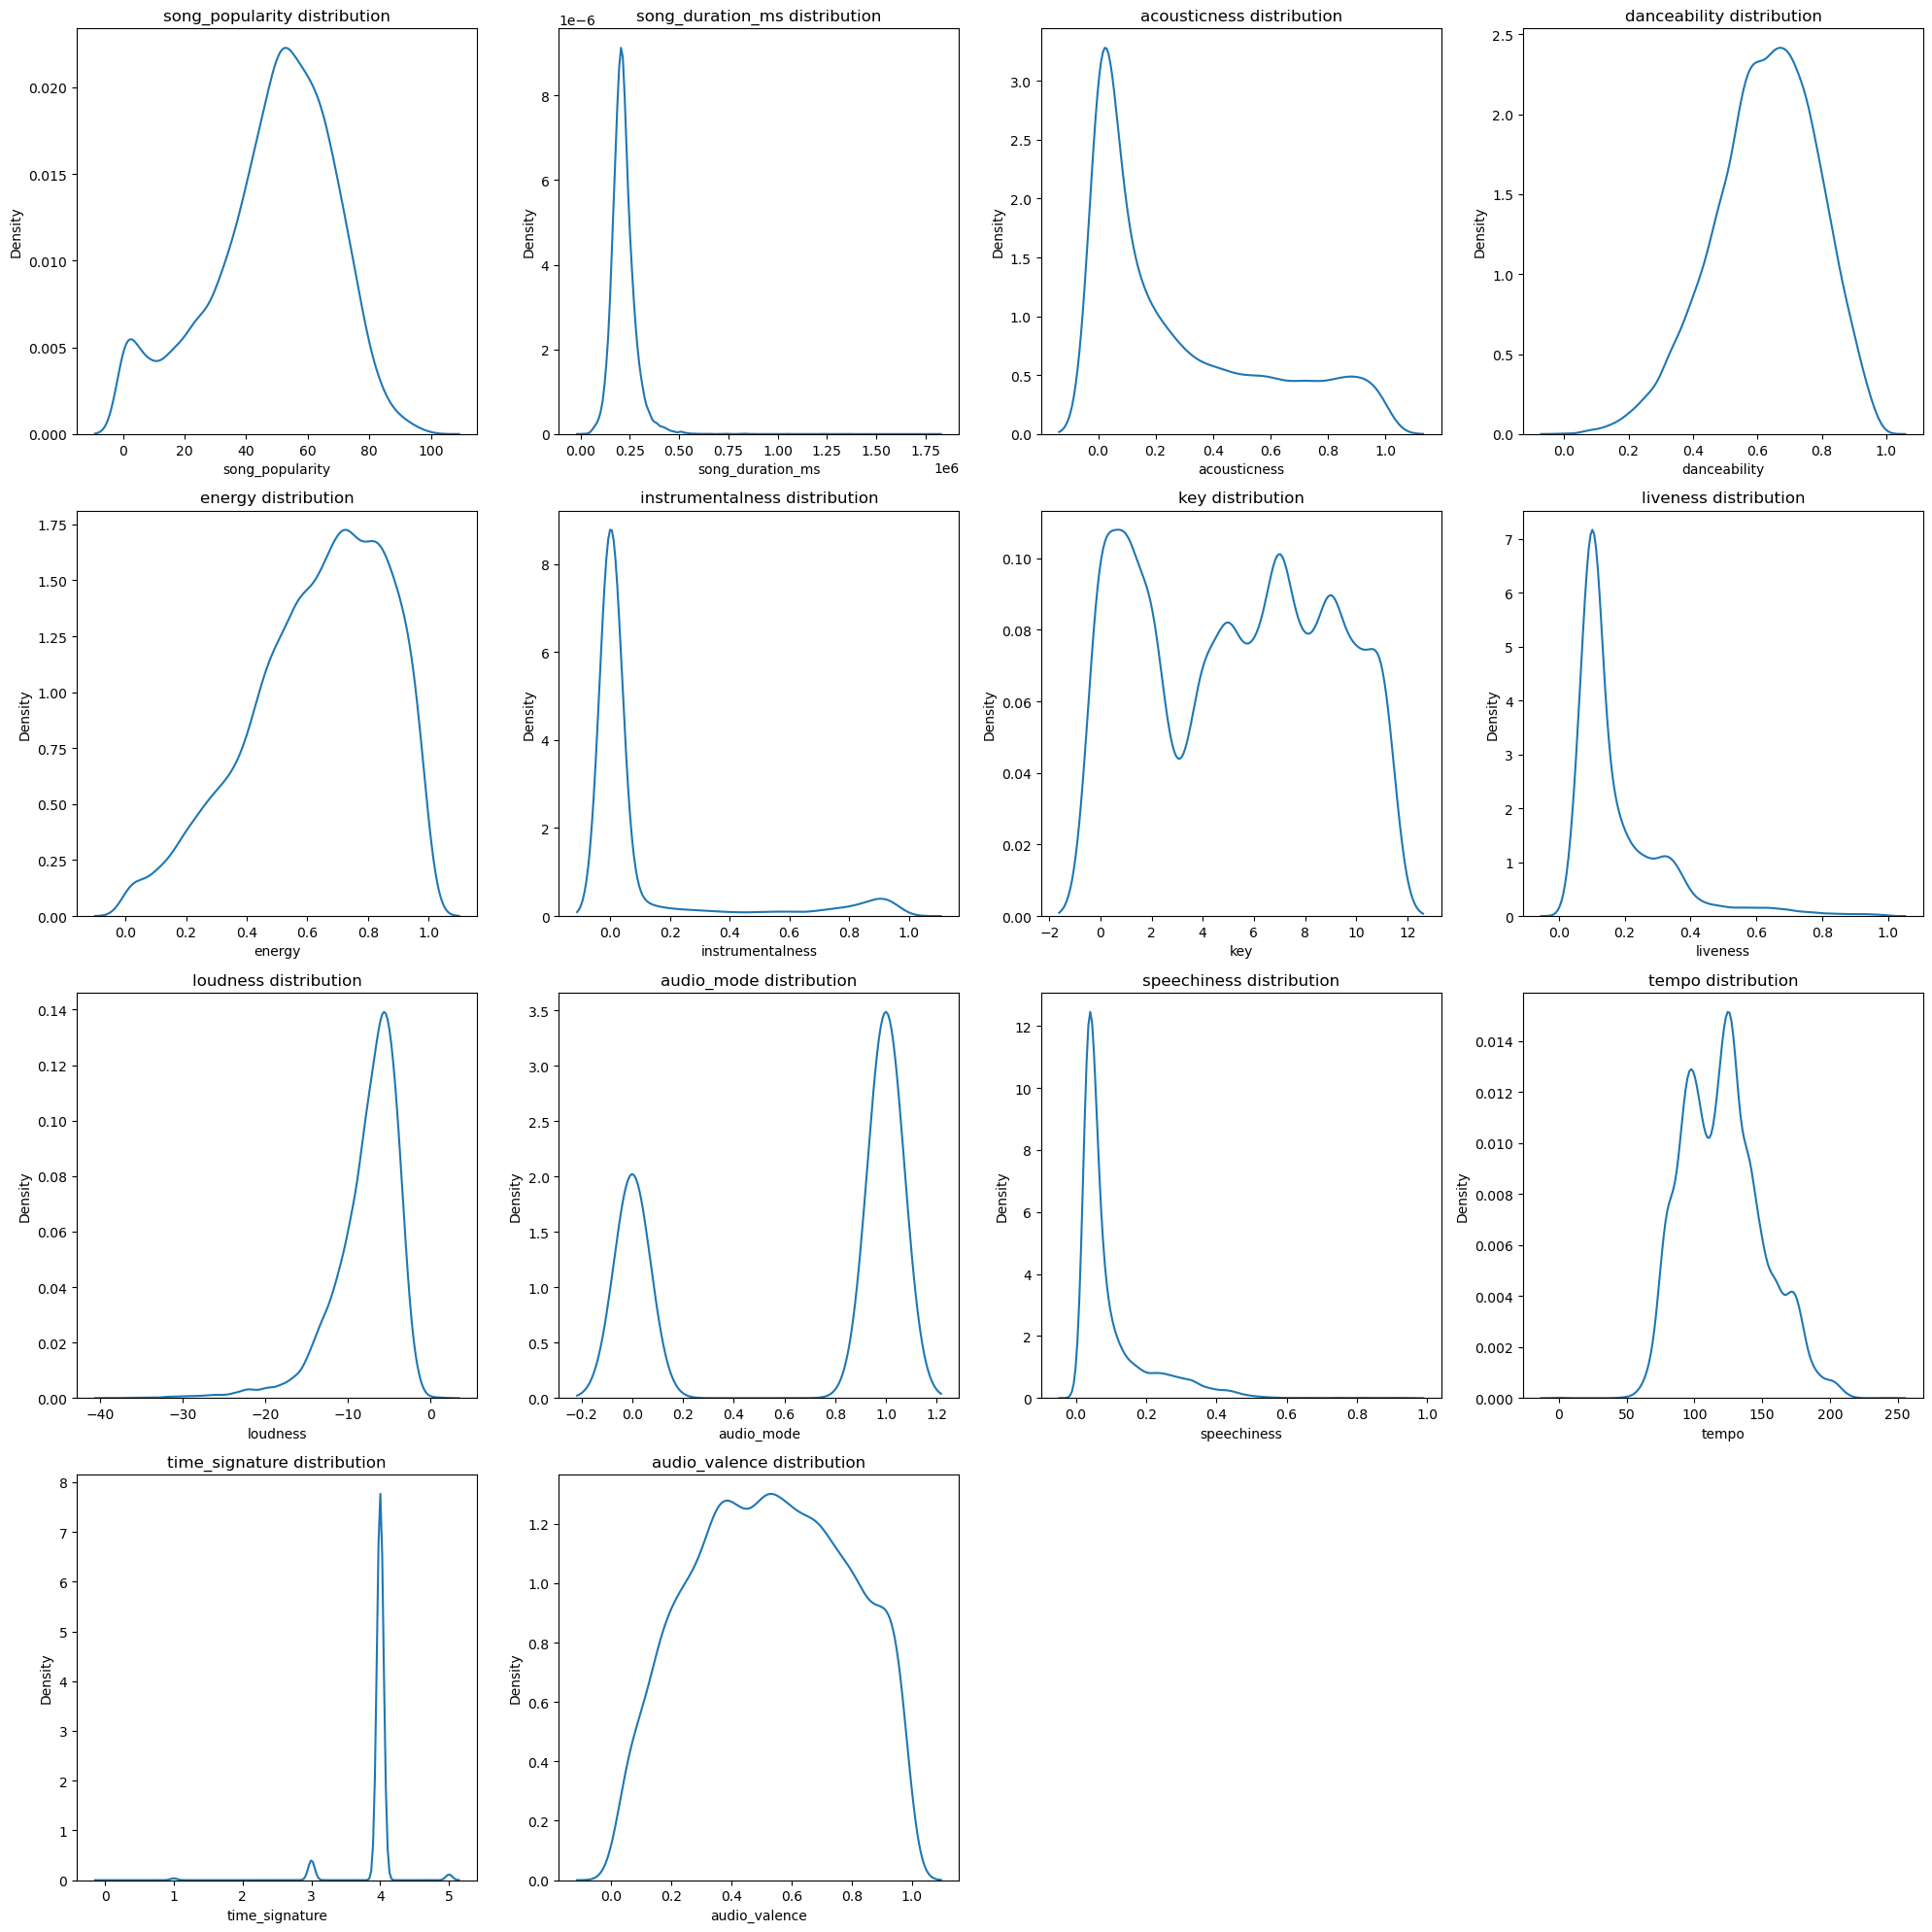

In [16]:
distribution_plots(temp_df,'kde')

## Subsection 2: Multivariate Analysis

This section is to test for multicollinearity in the dataset. We found that the two independent variables, loudness and energy are closely correlated. Due to the redudancy in the code and the correlation between the two variables, we have opted to drop the loudness column to avoid affecting the p-values and coefficients in our model.

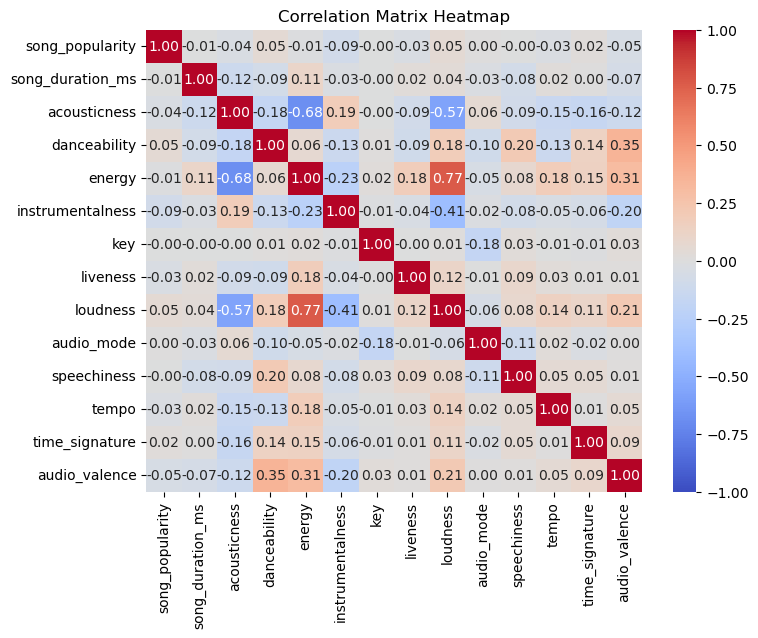

In [17]:
corr_matrix = temp_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

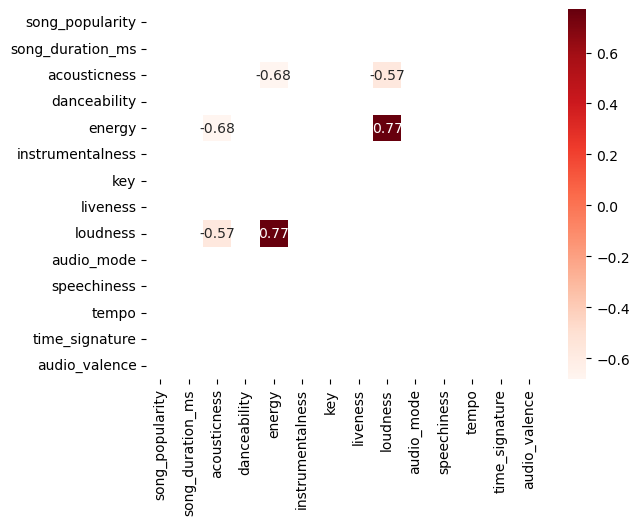

In [18]:
filteredDf = corr_matrix[((corr_matrix >= .5) | (corr_matrix <= -.5)) & (corr_matrix !=1.000)]
sns.heatmap(filteredDf, annot=True, cmap="Reds")

In [19]:
temp_df.drop(['loudness'], axis=1, inplace=True)
df.drop(['loudness'], axis=1, inplace=True)
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
18827                  Stay Awake               55            114582   
18830              Let It Breathe               60            159645   
18832      Sudden Love (Acoustic)               23            182211   
18833           Gentle on My Mind               55            352280   
18834                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
18827      0.898000         0.370   0.136          0.000263    7    0.0999   
18830      0.893000         0.500   0.151          0.000065   11    0.1110   
18832      0.847000         0.719   0.325          0.000000    0    0.1250   
18833      0.945000         0.488   0.326          0.015700    3    0.1190   
18834      0.911000         0.640   0.381          0.000254    4    0.1040   

       audio_mode  speechiness    tempo  time_signature  audio_valence  
0               1       0.0294  167.060               4         0.4740  
1               0       0.0498  105.256               4         0.3700  
2               1       0.0792  123.881               4         0.3240  
3               1       0.1070  122.444               4         0.1980  
4               1       0.0313  172.011               4         0.5740  
...           ...          ...      ...             ...            ...  
18827           1       0.0433  146.081               4         0.0592  
18830           1       0.0348  113.969               4         0.3000  
18832           1       0.0355  130.534               4         0.2860  
18833           1       0.0328  106.063               4         0.3230  
18834           1       0.0302   91.490               4         0.5810  

[13070 rows x 14 columns]

C:\Users\wdelc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


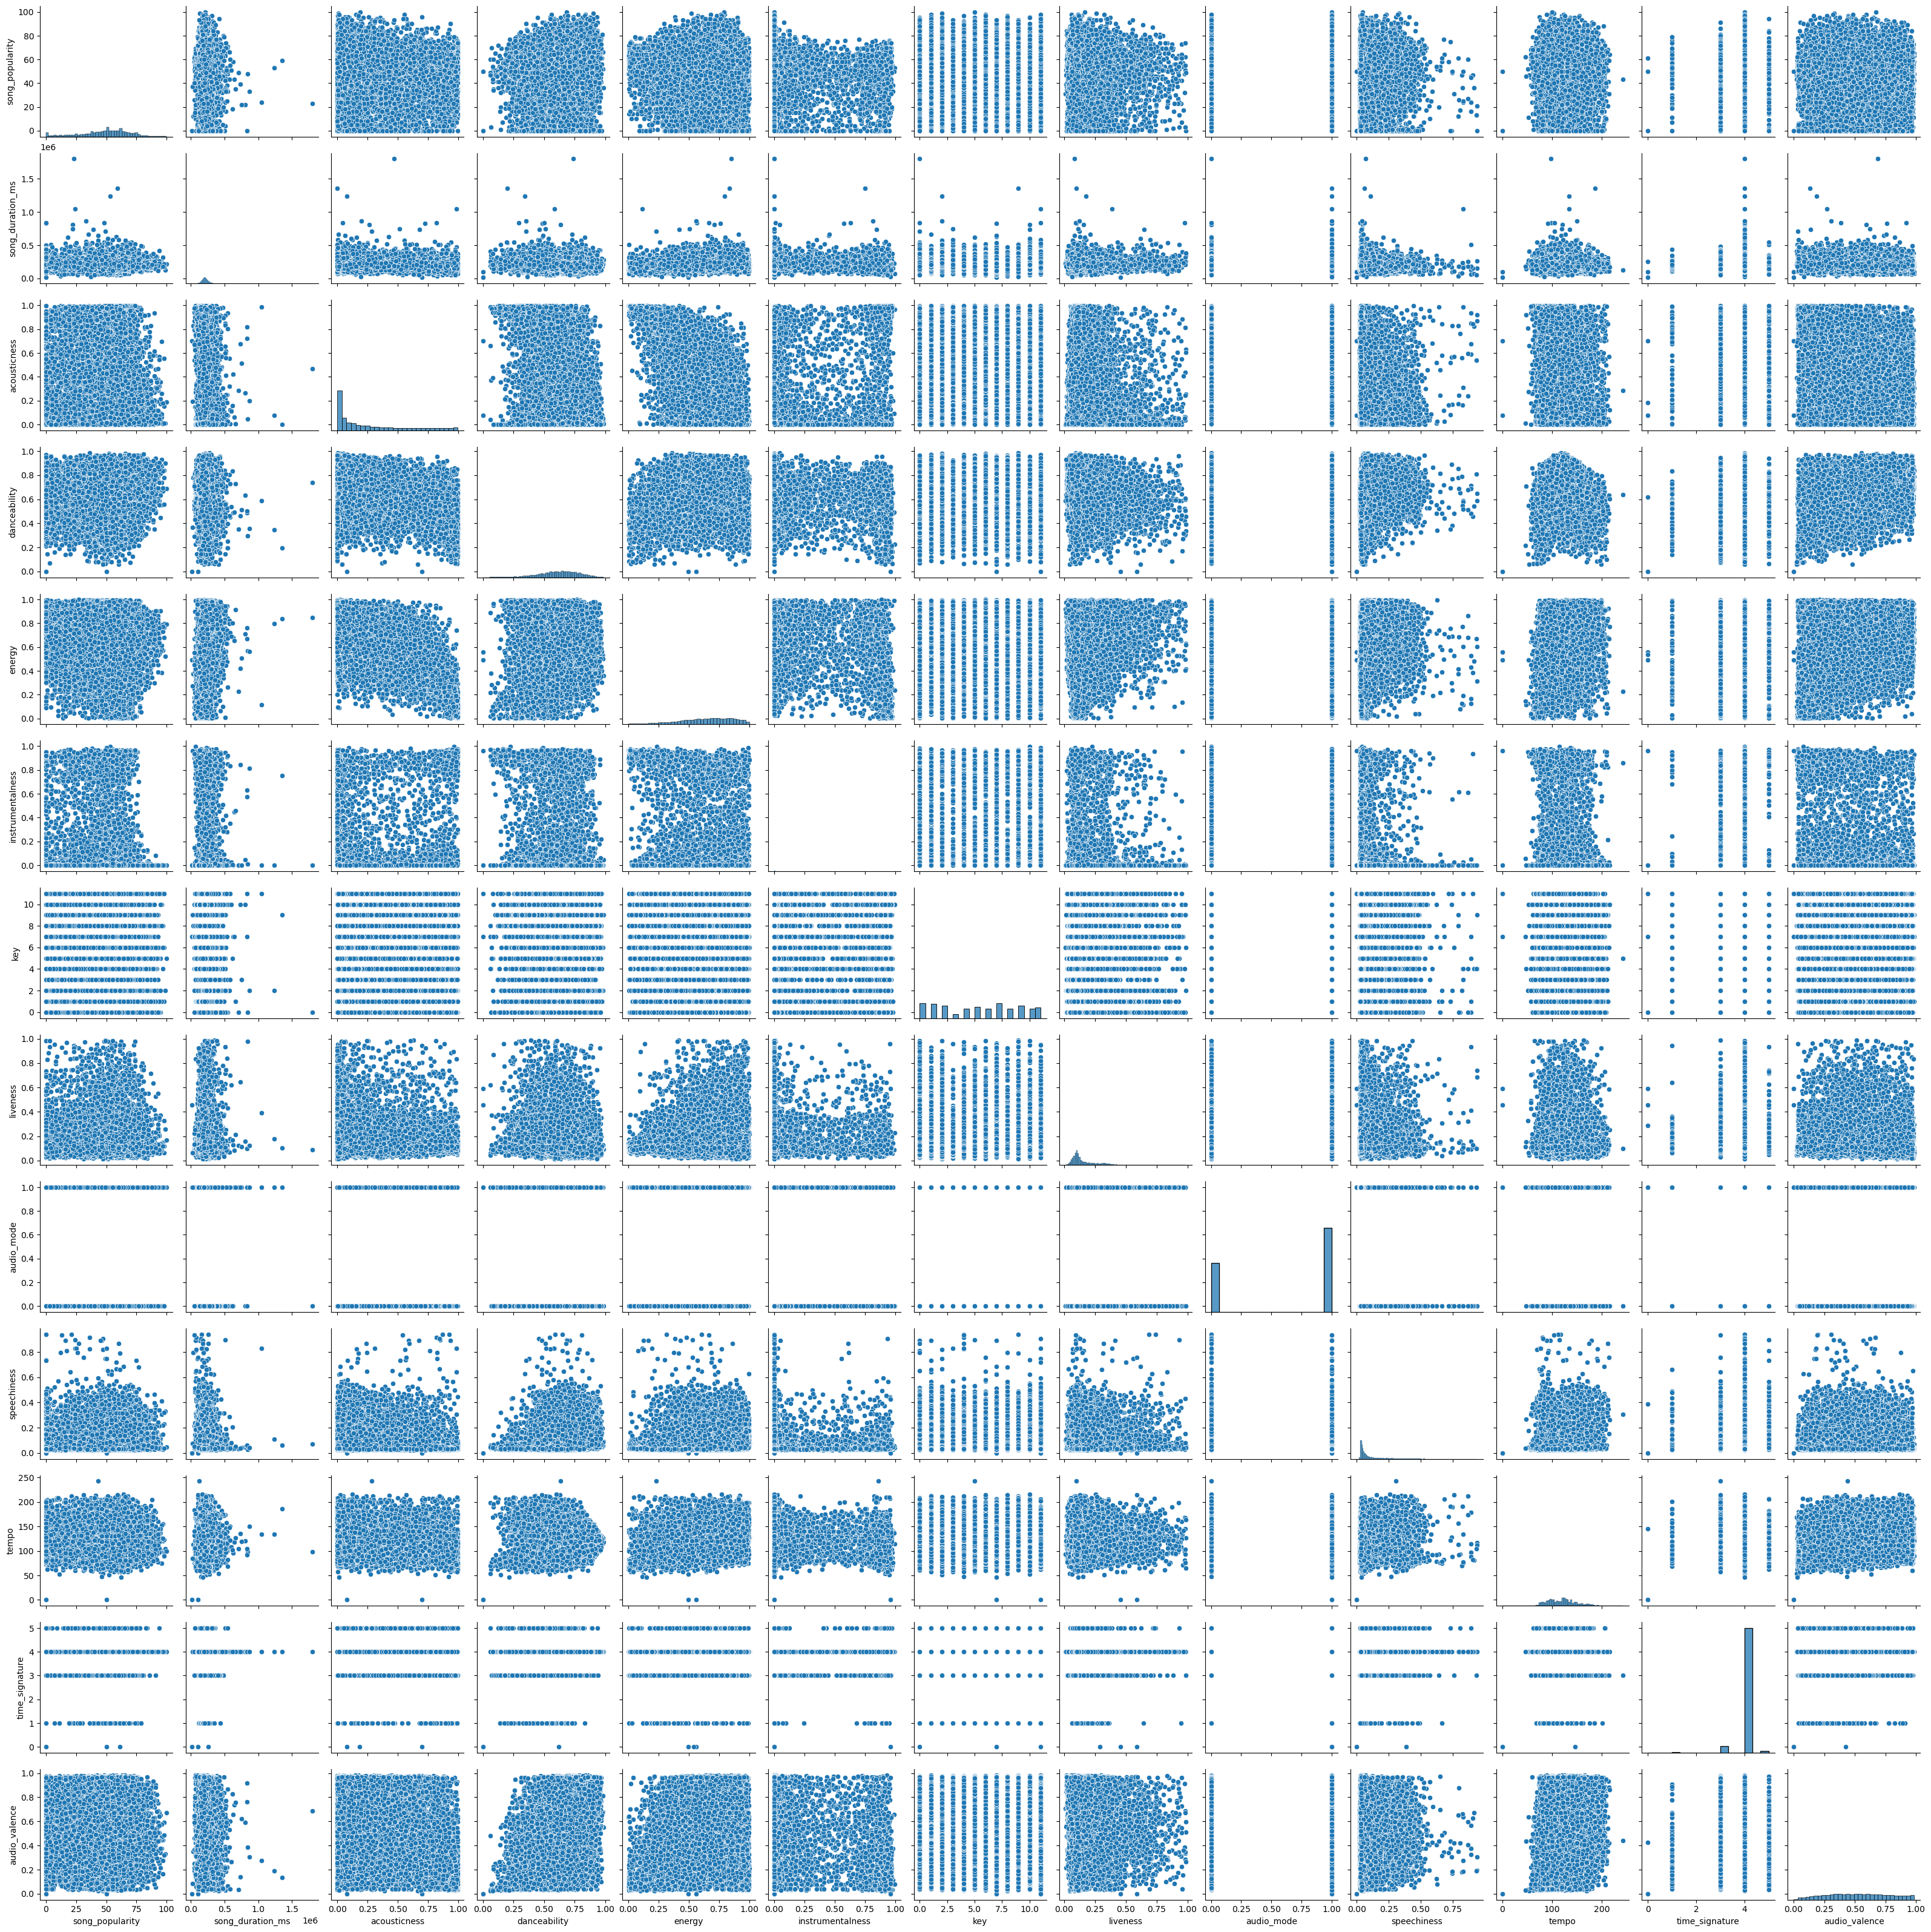

In [20]:
sns.pairplot(temp_df)

### Subsection 3: Grouping Analysis

We would like to perform a grouping analysis most of the features to determine if there is any correlation with the dependent variable (song_popularity). For variables that have less than 40 instances of unique values (discrete variables), we group by the discrete variable and compare it with the song_popularities dependent variable. The continuous variables were put into bins of 10 and compared with the mean similarly to the discrete variables.

For the following features here is my analysis:

1. audio_mode: Not statistically significant
2. Keys: Not statistically significant, mix of higher keys and lower keys for higher song popularities
3. song_duration_ms: Audiences tend to listen to shorter-mid range songs and longer songs do not fare well in comparison
4. acousticness: Less acoustic songs are preferred.
5. danceability: Danceability and the upbeat nature of the song, people tend to listen to more uppity songs
6. Energy: The lowest metric of energy has the highest while the median tends to lean towards somewhere in the middle.
7. Instrumentalness: The extremes (0 & 9) dominate and audiences are bipolar to very high or very low
8. Liveness: Not statistically significant, audiences are indifferent
9. Speechiness: Not statistically significant, audiences are indifferent
10. Tempo: Not statistically significant, audiences are indifferent
11. audio_valence: Audiences prefer sadder songs versus happier songs which might contradict what we found with danceability

In [21]:
unique_counts = temp_df.nunique()
continuous_variables = unique_counts[unique_counts > 40].index.tolist()

#Ignore the song_popularity option
continuous_variables.pop(0)

continuous_variables

['song_duration_ms',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'tempo',
 'audio_valence']

In [22]:
df[['audio_mode', 'song_popularity']].groupby(['audio_mode'],as_index=False).mean().sort_values(by="song_popularity", ascending=False)

audio_mode  song_popularity
1           1        48.490995
0           0        48.481968

In [23]:
df[['key', 'song_popularity']].groupby(['key'],as_index=False).mean().sort_values(by="song_popularity", ascending=False)

key  song_popularity
1     1        50.373219
6     6        50.111965
11   11        49.406780
10   10        49.203905
5     5        48.445642
8     8        48.124590
0     0        48.010782
2     2        47.690516
4     4        47.675052
7     7        47.602608
9     9        47.510383
3     3        47.395939

In [24]:
bin_df = temp_df

def bin_continuous_features(feature):
    
    bin_df['bin_ '+ feature] = pd.cut(bin_df[feature], bins=10, labels=False)

    
for i in continuous_variables:
    bin_continuous_features(i)   

bin_df

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0                   73            262333      0.005520         0.496   0.682   
1                   66            216933      0.010300         0.542   0.853   
2                   76            231733      0.008170         0.737   0.463   
3                   74            216933      0.026400         0.451   0.970   
4                   56            223826      0.000954         0.447   0.766   
...                ...               ...           ...           ...     ...   
18827               55            114582      0.898000         0.370   0.136   
18830               60            159645      0.893000         0.500   0.151   
18832               23            182211      0.847000         0.719   0.325   
18833               55            352280      0.945000         0.488   0.326   
18834               60            193533      0.911000         0.640   0.381   

       instrumentalness  key  liveness  audio_mode  speechiness  ...  \
0              0.000029    8    0.0589           1       0.0294  ...   
1              0.000000    3    0.1080           0       0.0498  ...   
2              0.447000    0    0.2550           1       0.0792  ...   
3              0.003550    0    0.1020           1       0.1070  ...   
4              0.000000   10    0.1130           1       0.0313  ...   
...                 ...  ...       ...         ...          ...  ...   
18827          0.000263    7    0.0999           1       0.0433  ...   
18830          0.000065   11    0.1110           1       0.0348  ...   
18832          0.000000    0    0.1250           1       0.0355  ...   
18833          0.015700    3    0.1190           1       0.0328  ...   
18834          0.000254    4    0.1040           1       0.0302  ...   

       audio_valence  bin_ song_duration_ms  bin_ acousticness  \
0             0.4740                      1                  0   
1             0.3700                      1                  0   
2             0.3240                      1                  0   
3             0.1980                      1                  0   
4             0.5740                      1                  0   
...              ...                    ...                ...   
18827         0.0592                      0                  9   
18830         0.3000                      0                  8   
18832         0.2860                      0                  8   
18833         0.3230                      1                  9   
18834         0.5810                      1                  9   

       bin_ danceability  bin_ energy  bin_ instrumentalness  bin_ liveness  \
0                      5            6                      0              0   
1                      5            8                      0              0   
2                      7            4                      4              2   
3                      4            9                      0              0   
4                      4            7                      0              1   
...                  ...          ...                    ...            ...   
18827                  3            1                      0              0   
18830                  5            1                      0              1   
18832                  7            3                      0              1   
18833                  4            3                      0              1   
18834                  6            3                      0              0   

       bin_ speechiness  bin_ tempo  bin_ audio_valence  
0                     0           6                   4  
1                     0           4                   3  
2                     0           5                   3  
3                     1           5                   2  
4                     0           7                   5  
...                 ...         ...                 ...  
18827                 0          

In [25]:
bin_df.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'bin_ song_duration_ms', 'bin_ acousticness', 'bin_ danceability',
       'bin_ energy', 'bin_ instrumentalness', 'bin_ liveness',
       'bin_ speechiness', 'bin_ tempo', 'bin_ audio_valence'],
      dtype='object')

In [26]:
for i in continuous_variables:
    print(bin_df[['bin_ ' + i,'song_popularity']].groupby(['bin_ ' + i],as_index=False).mean().sort_values(by="song_popularity", ascending=False))

   bin_ song_duration_ms  song_popularity
7                      7        59.000000
6                      6        53.000000
1                      1        49.212891
0                      0        47.345031
3                      3        46.583333
2                      2        43.179104
5                      5        24.000000
4                      4        23.428571
8                      9        23.000000
   bin_ acousticness  song_popularity
1                  1        51.105868
2                  2        50.171582
3                  3        49.640931
4                  4        48.377437
0                  0        48.321073
9                  9        47.505797
6                  6        46.869947
5                  5        46.818323
8                  8        46.209192
7                  7        45.122924
   bin_ danceability  song_popularity
9                  9        50.967593
8                  8        49.621451
6                  6        49.195282
7         

# Data Preprocessing

For preprocessing, 

- Separated independent variables and dependent variables

- Scaled all values with that were continuous.

- Dropped the song_name column, if we wanted a specific row we will pull up the index later.

- Split the data with a test size of 20%

In [27]:
df['song_popularity'].mean()

48.48768171384851

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    
    X = df.drop(columns=['song_popularity'])
    
    y = df['song_popularity']
    scaler = StandardScaler()
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    X.drop(columns=['song_name'], inplace=True)
    return train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = preprocess_data(df)

In [29]:
X_train

song_duration_ms  acousticness  danceability    energy  \
7859          -0.766837      1.849834      0.930061 -0.887245   
16625         -0.424290      1.873031      0.477568 -1.106018   
2319           0.139730     -0.883015      1.721923 -1.780194   
5936           1.566202      2.124876     -2.803005 -2.307034   
16580         -0.813694      0.789434      0.207329 -0.494347   
...                 ...           ...           ...       ...   
14760          1.965899      0.113430     -0.125756 -0.137168   
987            0.397783      2.048659     -0.314295 -1.936460   
6127           3.716399     -0.805142      0.986622 -0.413982   
16912          0.921896      2.164641     -0.502833 -2.195415   
239            1.684503      2.022149      0.219898 -2.284710   

       instrumentalness       key  liveness  audio_mode  speechiness  \
7859          -0.391984  1.026981  2.500382    0.761471    -0.043145   
16625         -0.355012 -0.926256 -0.450685    0.761471     1.750708   
2319          -0.385917  0.468913 -0.567627    0.761471     0.011041   
5936           3.091852  0.747947 -0.644671    0.761471    -0.479488   
16580         -0.392082 -0.926256 -0.597894   -1.313248    -0.357806   
...                 ...       ...       ...         ...          ...   
14760         -0.371357 -1.484323 -0.828339    0.761471    -0.162925   
987           -0.370667  1.026981 -0.285590   -1.313248    -0.657257   
6127           2.361807  1.026981  2.816814    0.761471    -0.321682   
16912          0.832770 -1.205289 -0.409411    0.761471    -0.630639   
239           -0.388983 -0.089154 -0.478201   -1.313248    -0.487093   

          tempo  time_signature  audio_valence  
7859  -0.594102         0.15169       0.717640  
16625 -1.346774         0.15169      -1.554700  
2319  -0.331529         0.15169       0.866448  
5936  -1.587563         0.15169      -1.838642  
16580  1.821314         0.15169       1.236457  
...         ...             ...            ...  
14760  0.913407         0.15169      -0.444672  
987    0.974326         0.15169      -0.983599  
6127   0.580020         0.15169       0.045993  
16912  0.236772         0.15169      -0.830769  
239    0.301230         0.15169      -0.669895  

[10456 rows x 12 columns]

In [30]:
y_test

15712    22
5148     40
8785     70
5763     50
9898     42
         ..
3811     27
11301    22
2717     13
5695     58
6947     61
Name: song_popularity, Length: 2614, dtype: int64

# Models: 

## Linear Regression:

Lets first try a linear regression model to see if the features can correlate with the dependent variables. We reduced and selected the features that would be the most beneficial to our model and used those variables to gather results. The final score was 2% which is a very weak correlation for multi linear regression. To optimize our models a bit better we turned to logistic regression

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

def linear_regression_model(X_train, X_test, y_train, y_test):
    
    regression = LinearRegression()    
    
    rfecv = RFECV(estimator=regression, cv=5)
    rfecv.fit(X_train, y_train)
    
    X_train_reduced = rfecv.transform(X_train)
    X_test_reduced = rfecv.transform(X_test)
    
    regression.fit(X_train_reduced, y_train)
    
    prediction = regression.predict(X_test_reduced)
    
    comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":prediction})
    
    Coeff = regression.coef_
    MeanSquare = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    
    r_sq = regression.score(X_test_reduced, y_test)
    
    print("R^2 is: ", r_sq)
    print("MSE is: ", MeanSquare)
    
  
    
    
    print(comparison_df)
    
linear_regression_model(X_train, X_test, y_train, y_test)

R^2 is:  0.01899479598944398
MSE is:  417.63267158052827
       Actual  Predicted
15712      22  49.295820
5148       40  51.302662
8785       70  48.685925
5763       50  42.405630
9898       42  47.384192
...       ...        ...
3811       27  45.503387
11301      22  47.660057
2717       13  45.752886
5695       58  40.812161
6947       61  48.522667

[2614 rows x 2 columns]


# Logistic Regression

After a poor performance from our linear regression model, I decided to simplify the data set specifically the dependent variable to be binary [0 or 1]. This will allow for a logistic regression model that might have more success with 0 being "Not popular" and 1 being "Popular". We split the data across the mean and then apply it as the dependent variable in our new version of preprocessing the data. We perform Hyper Paramter tuning to determine which model paramters will perform the best. Given the results of the GridSearch, we use the lowest regularlization and use the liblinear l2 ridge regularization. The coefficients correspond with what we found in our grouping analysis with audio_valence and instrumentalness having the lowest coefficients. Overall, the model reports an accuracy of 56% percent. While the model performed modestly, it may not be applicable for record companies to use to determine or predict a songs popularity. 

- When evaluating precision, Class 0 (Not Popular) performed worse then Class 1 ("Popular") and the predictions for a not popular song might not be very accurate. 

- When evaluating recall, Class 0 (Not Popular) performed worse then Class 1 ("Popular"). When predicting the instances from class 1 the model performed great. Nonetheless it comes at the expense of the low recall of class 0 where the model did not accurately predict not popular instances well

- When evaluating recall, Class 0 (Not Popular) performed worse then Class 1 ("Popular"). For class 0 the balance between precision and recall is poor while class 1 the model performs modestly for positive cases.

- The model performs reasonably well in identifying positive instances (Class 1) with high recall (85%) but struggles with negative instances (Class 0), as evidenced by the low recall (19%) and precision (50%).

- Model is only a small improvement from random guessing with an accuracy of 57%

- One way we can improve the model is to fix the class imbalance

In [33]:
def preprocess_data2(df):
    
    X = df.drop(columns=['song_popularity'])
    df["song_popularity"] = [1 if i>= 48.48 else 0 for i in df.song_popularity]
    y = df['song_popularity']
    scaler = StandardScaler()
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    
    X.drop(columns=['song_name'], inplace=True)
    return train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X_train, X_test, y_train, y_test = preprocess_data2(df)

In [35]:
df['song_popularity'].value_counts()

song_popularity
1    7368
0    5702
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(best_model)

LogisticRegression(C=0.01, max_iter=1000)


In [37]:
from sklearn.linear_model import LogisticRegression


logistic_reg = LogisticRegression(penalty='l2', C=0.01 , max_iter=1000, solver='liblinear')



logistic_reg.fit(X_train, y_train)

print('intercept ', logistic_reg.intercept_[0])
print('classes', logistic_reg.classes_)
pd.DataFrame({'coeff': logistic_reg.coef_[0]}, 
             index=X_train.columns)


intercept  0.2516620421993383
classes [0 1]


coeff
song_duration_ms -0.035954
acousticness     -0.095297
danceability      0.052269
energy           -0.039014
instrumentalness -0.165053
key               0.023672
liveness         -0.064701
audio_mode        0.006077
speechiness      -0.070408
tempo            -0.037896
time_signature    0.028067
audio_valence    -0.196109

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Best Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}
Accuracy: 0.56
Confusion Matrix:
[[ 215  931]
 [ 217 1251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.19      0.27      1146
           1       0.57      0.85      0.69      1468

    accuracy                           0.56      2614
   macro avg       0.54      0.52      0.48      2614
weighted avg       0.54      0.56      0.50      2614

